# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [24]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE): #controllo sel il "FFILE" è già caricato, altrimenti lo carico io
    print("File already exists")
    if os.access(FFILE, os.R_OK): #se il file è già presente, controllo se è leggibile
        print ("File is readable")
    else: #se non è leggibile lo elimino e lo riscarico
        print ("File is not readable, removing it and downloading again")
        !rm FFILE #con il ! faccio comandi direttaente in console
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else: #se il "FFILE" non è presente, lo carico
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [25]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
# La funzione dataframe.iloc non fa nient'altro che "tagliare" il dataset a partire da un determinato input;
# mentre values fa ritornare una versione numpy della matrice
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [26]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


***Play with data***

In [27]:
# Guardo la dimensione del dataset
df.shape

(50, 5)

In [28]:
# Ora, non faccio nient'altro che sostituire i miei valori "mancanti" con la media dei valori che possiedo, di quella specifica feature
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
# Stampo le prime 5 righe
df.head()

<ipython-input-28-35627d3e7ac9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [29]:
# Ora voglio andare a lavorare da una classificazione ternaria a binaria,
# non faccio altro che creare un dataset con le labels (y) di "California" e "Floarida"
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [30]:
# Stampo le prime 5 righe
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [31]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [32]:
# In regola al ragionamento fatto sopra creo un One-hot-encoding a partire dal dataset binario
df_one = pd.get_dummies(df_sel["State"])

In [33]:
# Stampo le prime 5 righe
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [34]:
# construct the final dataset that you will use for learning and prediction
# Voglio liberarmi della colonna "State", in particolare del tipo object, e usare solo il One-hot-encofing.
# Procedo a fare quindi una specie di merge, senza star a creare troppe colonne nuove:
# elimino la colonna "Florida", data dall' OHE, e uso lo 0 di California come seconda classe,
# poi droppo la tabella "State" e rinomino "California" state.
# Mi troverò con un unica collonna, sempre rinominata "state", ma che orà sarà più comprensibile al calcolatore.
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
print(df_fin)

    State    R&D Spend  Administration  Marketing Spend     Profit
1       1  162597.7000       151377.59      443898.5300  191792.06
2       0  153441.5100       101145.55      407934.5400  191050.39
4       0  142107.3400        91391.77      366168.4200  166187.94
6       1  134615.4600       147198.87      127716.8200  156122.51
7       0  130298.1300       145530.06      323876.6800  155752.60
9       1  123334.8800       108679.17      304981.6200  149759.96
10      0  101913.0800       110594.11      229160.9500  146121.95
11      1  100671.9600        91790.61      249744.5500  144259.40
12      0   93863.7500       127320.38      249839.4400  141585.52
13      1   91992.3900       135495.07      252664.9300  134307.35
14      0  119943.2400       156547.42      256512.9200  132602.65
16      1   78013.1100       121597.55      264346.0600  126992.93
18      0   91749.1600       114175.79      294919.5700  124266.90
20      1   76253.8600       113867.30      298664.4700  11847

In [35]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [36]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [37]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [38]:
df_fin

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091
9,1.0,0.758528,0.595028,0.687053,0.780845
10,0.0,0.626781,0.605512,0.516246,0.761877
11,1.0,0.619148,0.502561,0.562616,0.752166
12,0.0,0.577276,0.697090,0.562830,0.738224
13,1.0,0.565767,0.741847,0.569195,0.700276


In [39]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [40]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [41]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

# Dove "X_train" e "y_train" sono i dati su cui allenerò il modello, "X_test" sono i dati su cui testerò il modello per ottenere delle
# predizioni (predictions) e "y_test saranno i veri valori che confronterò con le predizioni"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(y_test)

[1. 1. 1. 0. 0. 1. 1. 1. 0.]


Train the Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

w = LR.coef_[0]
b = LR.intercept_[0]
print(w, b)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

print("\nPrediction\tGround Truth")
for i,e in enumerate(predictions):
  print(e,"\t\t", y_test[i])
print("")


# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

print("Accuracy:", accuracy)

[ 0.38117296  0.23459601 -0.37926331 -0.19869227] -0.19778811161148935

Prediction	Ground Truth
0.0 		 1.0
0.0 		 1.0
0.0 		 1.0
0.0 		 0.0
0.0 		 0.0
0.0 		 1.0
0.0 		 1.0
0.0 		 1.0
0.0 		 0.0

Accuracy: 0.3333


***Plot results***

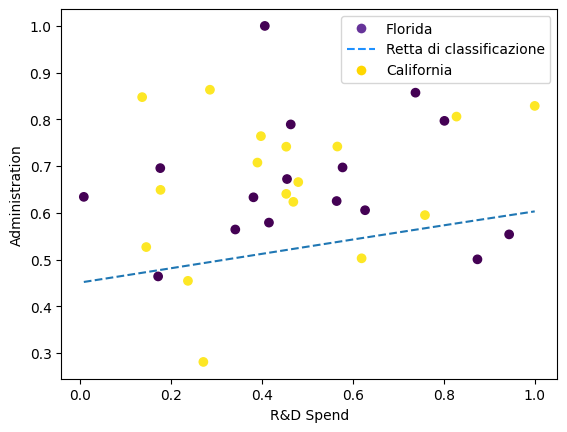

In [44]:
Reg0 = df_fin["R&D Spend"]
Reg1 = df_fin["Administration"]
Reg2 = df_fin["Marketing Spend"]
Reg3 = df_fin["Profit"]
Explained = df_fin["State"]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg0,Reg1,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg0), max(Reg0), 100)
y = 1/(1+np.exp(-w[0]*x-w[1]*x-b))
plt.plot(x,y, "--")
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.show()


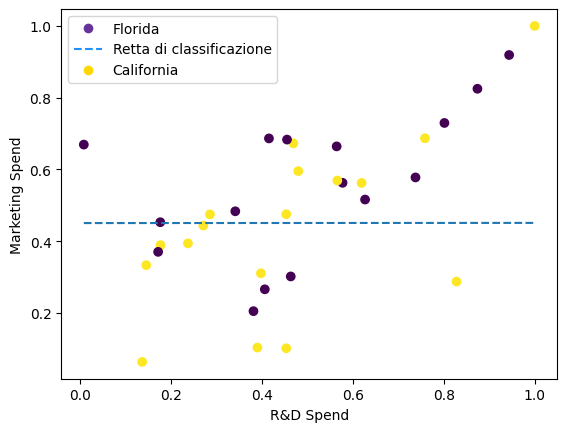

In [45]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg0,Reg2,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg0), max(Reg0), 100)
y = 1/(1+np.exp(-w[0]*x-w[2]*x-b))
plt.plot(x,y, "--")
plt.xlabel("R&D Spend")
plt.ylabel("Marketing Spend")
plt.show()

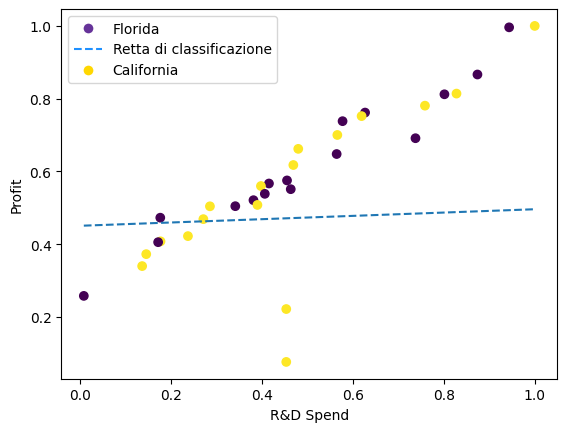

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg0,Reg3,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

plt.xlabel("R&D Spend")
plt.ylabel("Profit")

x = np.linspace(min(Reg0), max(Reg0), 100)
y = 1/(1+np.exp(-w[0]*x-w[3]*x-b))
plt.plot(x,y, "--")
plt.show()

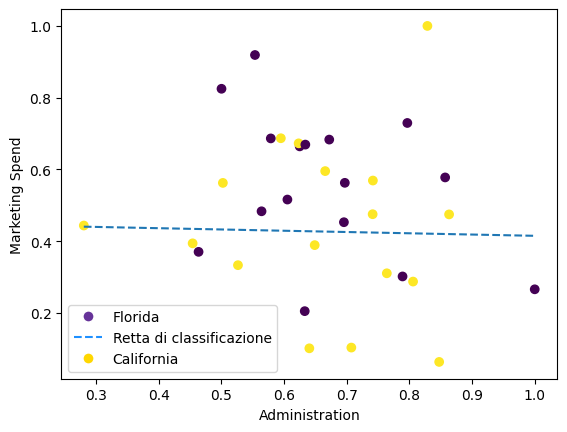

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg1,Reg2,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg1), max(Reg1), 100)
y = 1/(1+np.exp(-w[1]*x-w[2]*x-b))
plt.plot(x,y, "--")

plt.xlabel("Administration")
plt.ylabel("Marketing Spend")
plt.show()

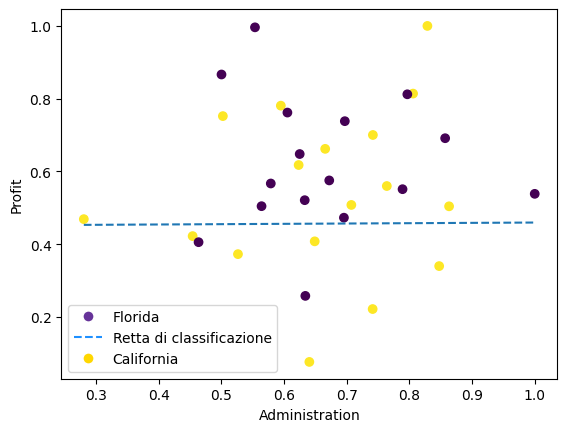

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg1,Reg3,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg1), max(Reg1), 100)
y = 1/(1+np.exp(-w[1]*x-w[3]*x-b))
plt.plot(x,y, "--")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

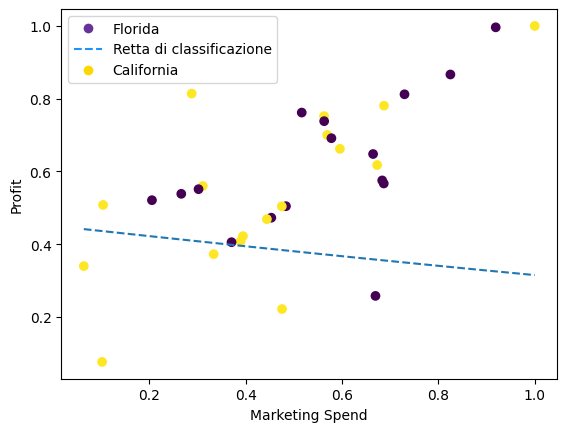

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg2,Reg3,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg2), max(Reg2), 100)
y = 1/(1+np.exp(-w[2]*x-w[3]*x-b))
plt.plot(x,y, "--")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()


***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [50]:
import numpy.linalg as LA

seed = 27

def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

## --------- ##
## RIDGE REG ##
## --------- ##
def RidgeGradient(w, lam1):
    return 2*lam1*w

def LogisticLossRIDGE(X, labels, w, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam1*LA.norm(w,2)**2
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term
    return cost

def GDLogisticRIDGE(X, labels, iter, gamma, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)

    cost = np.zeros(iter)

    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])

    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = RidgeGradient(w,lam1)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossRIDGE(X, labels, w, lam1)

    return W, cost



## --------- ##
## LASSO REG ##
## --------- ##
def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

def LogisticLossLASSO(X, labels, w, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam1*LA.norm(w,1)
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term
    return cost


def GDLogisticLASSO(X, labels, iter, gamma, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)


    cost = np.zeros(iter)

    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])
    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = LassoGradient(w,lam1)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossLASSO(X, labels, w, lam1)

    return W, cost

## ----------- ##
## ELASTIC NET ##
## ----------- ##
def ElasticNetGradient(w, lam1, lam2):
    return RidgeGradient(w,lam1) + LassoGradient(w,lam2)


def LogisticLossELASTICNET(X, labels, w, lam1, lam2):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam2*LA.norm(w,1)**2 + lam1*LA.norm(w,1)**2
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term
    return cost

def GDLogisticELASTICNET(X, labels, iter, gamma, lam1,lam2):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)
    cost = np.zeros(iter)
    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])


    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = ElasticNetGradient(w,lam1,lam2)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossELASTICNET(X, labels, w, lam1, lam2)

    return W, cost

# ----------- #
# PREDICTIONS #
# ----------- #

def LR_prediction(X,w, alpha = 0.5):
  """
  X = data
  w = coefficients
  alpha = threshold

  returns: predicted data (minimizing area)
  """
  pred = sigmoidM(X,w)
  return (pred>=alpha).astype(int)


# -------- #
# ACCURACY #
# -------- #
def accuracy(y_test, y_predicted, coefficients):
  similar = [e==y_test[i] for i,e in enumerate(y_predicted)]
  num_well_pred = sum(similar)
  N = len(similar)

  return num_well_pred/N


# --------- #
# LOSS PLOT #
# --------- #
def plot_loss(cost):
  plt.plot(cost)
  plt.title('Loss Plot')
  plt.xlabel('Iter')
  plt.ylabel('Loss')
  plt.show()




RIDGE
 Predict [1 1 1 1 1 1 1 1 1] for [1. 1. 1. 0. 0. 1. 1. 1. 0.] 
 [ 0.17754594  0.04979807 -0.31041244 -0.18781339] 
 [[ 0.38117296  0.23459601 -0.37926331 -0.19869227]]
Accuracy with alpha = 0.44:  0.6666666666666666
Train Loss: 0.6848452542506027


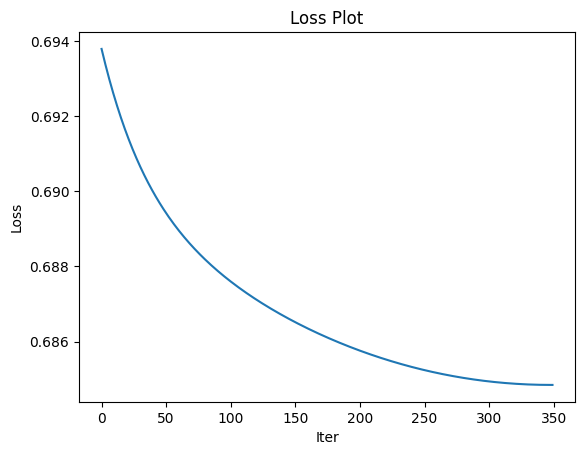

Accuracy with alpha = 0.44:  0.6666666666666666
Train Loss: 0.666726683758679


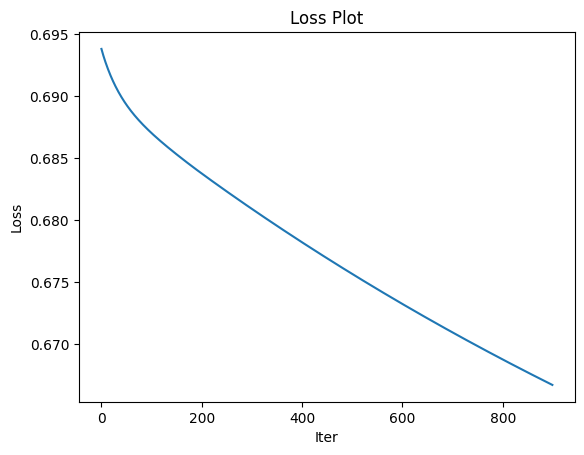

Accuracy with alpha = 0.44:  0.6666666666666666
Train Loss: 0.6890104511911552


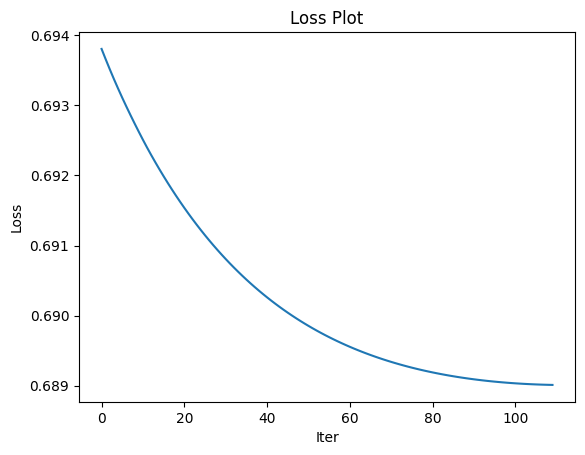

In [51]:
gamma = 0.02
alpha = 0.44

lam1 = 0.035
lam2 = 0.001


# RIDGE

iter = 350

W, cost = GDLogisticRIDGE(X_train, y_train, iter, gamma, lam1)
w_ridge = W[:,-1]
cost_ridge = cost[-1]
y_pred_ridge = LR_prediction(X_test,w_ridge, alpha)
print("\n\nRIDGE\n", "Predict",y_pred_ridge, "for", y_test,"\n", w_ridge, "\n", LR.coef_)
print("Accuracy with alpha = {}: ".format(alpha), accuracy(y_test, y_pred_ridge, w_ridge))
print("Train Loss:", cost_ridge)
plot_loss(cost)





# LASSO
iter = 900

W, cost = GDLogisticLASSO(X_train, y_train, iter, gamma, lam2)
w_lasso = W[:,-1]
cost_lasso = cost[-1]
y_pred_lasso = LR_prediction(X_test,w_lasso, alpha)
print("Accuracy with alpha = {}: ".format(alpha), accuracy(y_test, y_pred_lasso, w_ridge))
print("Train Loss:", cost_lasso)
plot_loss(cost)





# ELASTIC NET
iter = 110
W, cost = GDLogisticELASTICNET(X_train, y_train, iter, gamma, lam1, lam2)
w_elasticnet = W[:,-1]
cost_elasticnet = cost[-1]
y_pred_elasticnet = LR_prediction(X_test,w_elasticnet, alpha)
print("Accuracy with alpha = {}: ".format(alpha), accuracy(y_test, y_pred_elasticnet, w_ridge))
print("Train Loss:", cost_elasticnet)
plot_loss(cost)

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [52]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Repeat the previous task for regularized logistic regression and compare the results.

In [53]:
## RIDGE
y_pred = y_pred_ridge

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))
print("\n")

## LASSO
y_pred = y_pred_lasso

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))
print("\n")

## ELASTIC NET
y_pred = y_pred_elasticnet

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))
print("\n")


              precision    recall  f1-score   support

  California       0.00      0.00      0.00         3
     Florida       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



              precision    recall  f1-score   support

  California       0.50      0.33      0.40         3
     Florida       0.71      0.83      0.77         6

    accuracy                           0.67         9
   macro avg       0.61      0.58      0.58         9
weighted avg       0.64      0.67      0.65         9



              precision    recall  f1-score   support

  California       0.00      0.00      0.00         3
     Florida       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

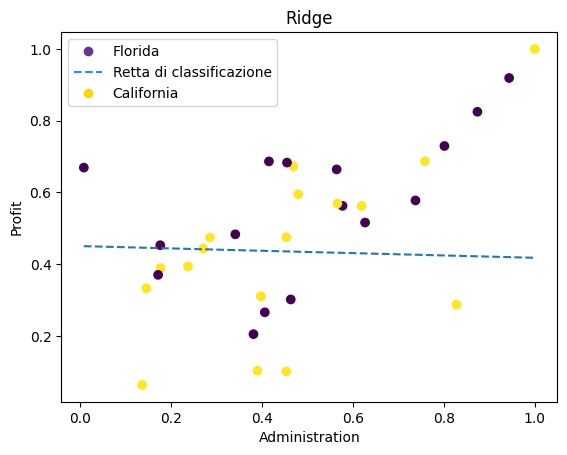

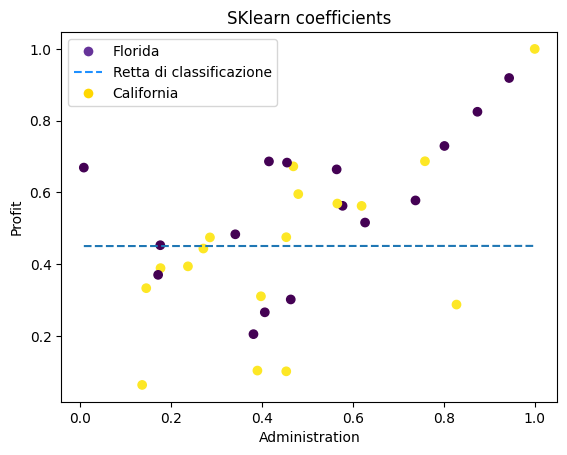

In [54]:
w = w_ridge

# RIDGE
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg0,Reg2,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg0), max(Reg2), 100)
y = 1/(1+np.exp(-w[0]*x-w[2]*x-b))
plt.plot(x,y, "--")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Ridge")
plt.show()

w = LR.coef_[0]


# SKLEARN
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Reg0,Reg2,   c= (Explained))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Florida'),
                   plt.Line2D([0], [0], linestyle='--', color='dodgerblue', label='Retta di classificazione'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='California'),]
ax.legend(handles = legend_elements)

x = np.linspace(min(Reg0), max(Reg2), 100)
y = 1/(1+np.exp(-w[0]*x-w[2]*x-b))
plt.plot(x,y, "--")
plt.xlabel("Administration")
plt.title("SKlearn coefficients")
plt.ylabel("Profit")
plt.show()

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [55]:
def FPR_TPR_calc(X,w,y_true, alpha):

  y_pred = LR_prediction(X,w,alpha)

  TP = FP = TN = FN = 0
  for i,e in enumerate(y_true):
    if e == 0 and y_pred[i] == 0:
      TN += 1
    elif e == 1 and y_pred[i] == 1:
      TP += 1
    elif e == 0 and y_pred[i] == 1:
      FP += 1
    elif e == 1 and y_pred[i] == 0:
      FN += 1

  FPR = FP / (FP + TN)
  TPR = TP / (TP + FN)

  return FPR, TPR


def ROC_curve(X, w, y_true, title = ""):

  alpha_values = np.linspace(0,1,100000)

  false_positive_rate_vector = []
  true_positive_rate_vector = []

  for i in alpha_values:

    fpr, tpr = FPR_TPR_calc(X,w,y_true, i)

    false_positive_rate_vector.append(fpr)
    true_positive_rate_vector.append(tpr)

  plt.plot(false_positive_rate_vector,true_positive_rate_vector, "")
  plt.xlabel("FPR: false positive rate")
  plt.ylabel("TPR: true positive rate")
  plt.title(title)

  plt.plot([0,1], [0,1], "k--")

  from sklearn import metrics
  AUC = metrics.auc(false_positive_rate_vector, true_positive_rate_vector)
  print(AUC)

  plt.show()

0.7132867132867132


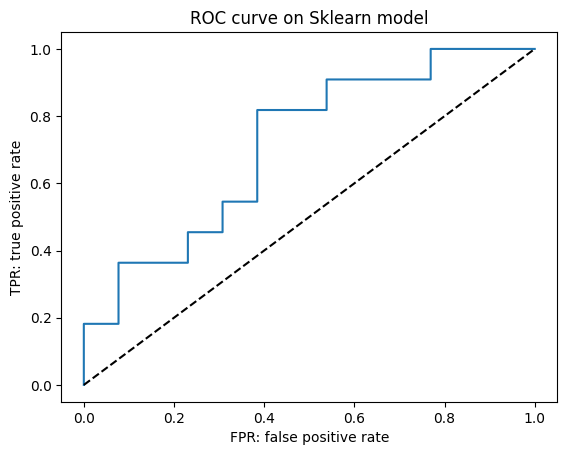

In [56]:
ROC_curve(X_train, w, y_train, "ROC curve on Sklearn model")

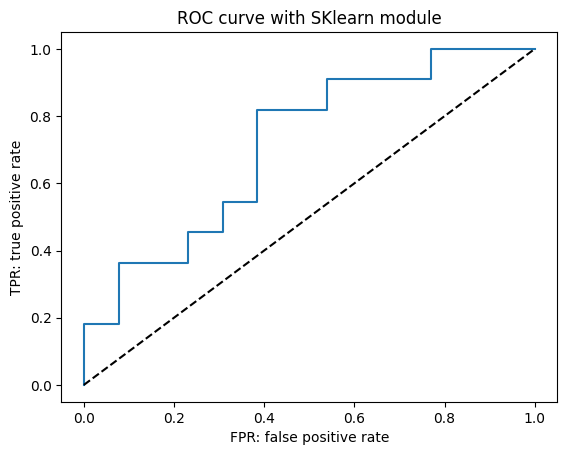

0.7132867132867133


In [57]:
import sklearn
from sklearn import metrics

y_train = np.array([int(i) for i in y_train])
y_score = 1/(1+np.exp(-X_train@w))

fpr_sk, tpr_sk, threshold = sklearn.metrics.roc_curve(y_train, y_score)
AUC = metrics.auc(fpr_sk, tpr_sk)


plt.plot(fpr_sk, tpr_sk)
plt.plot([0,1],[0,1], "k--")
plt.title("ROC curve with SKlearn module")
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")
plt.show()

print(AUC)